In [2]:
import pandas as pd 
import numpy as np 
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime
import cartopy.feature as cf
import cartopy.crs as ccrs
import datetime 

np.warnings.filterwarnings('ignore')


from split_filename import *
from GOLD import *
import os

def sep_hemispheres(ds, parameter = 'n2_lbh_unc_ran'):
    
    """
    returns
    -------
        like dataframe with informations of south and north
    """

    south = ds.isel(nscans = np.arange(1, len(ds.nscans.values), 2))

    df_south = south[parameter].mean(dim = ['nlats', 'nlons'],  skipna = True).to_dataframe()
    
    north = ds.isel(nscans = np.arange(0, len(ds.nscans.values), 2))
    
    df_north = north[parameter].mean(dim = ['nlats', 'nlons'],  skipna = True).to_dataframe()
    
    df_south.index.name = 'Time UTC'
    df_south.columns = ['south']
    df_north.index.name =  'Time UTC'
    df_north.columns = ['north']

    return df_north, df_south

def plotting_hemispheres(ax, ds, parameter = 'radiance_oi_1356'):
    
    north, south = sep_hemispheres(ds, parameter = parameter)
    
    north.plot(ax = ax, color = 'red', lw = 2, legend = False)
    south.plot(ax = ax, color = 'black', lw = 2, legend = False)

    args_names = ds[parameter].attrs
    title = args_names['FIELDNAM']
    xlabel = 'Time UTC'
    name = args_names['CATDESC']
    units = args_names['UNITS']
    #ylabel = args_names['LABLAXIS']

    ax.set(xlabel = xlabel, ylabel = f"{name} ({units})")

    ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(dates.HourLocator(interval = 2))


ValueError: could not broadcast input array from shape (0,0) into shape (4,4)

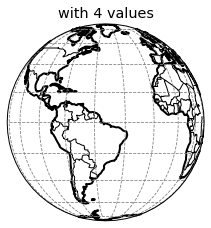

In [107]:
infile = 'C:\\Users\\Luiz Felipe\\Downloads\\TDISK2019111120191112\\tmp\\archive_L2\\2019\\315\\' 
filename = 'GOLD_L2_TDISK_2019_315_v02_r01_c01.nc'

ds = xr.open_dataset(infile + filename)

ds.coords['nmask'] = ds['mask_wavelength']
ds.coords['nscans'] = bytes_string(ds['scan_start_time'])

altitude = ds['effective_altitude'].mean().values

n = ds.isel(nscans = 34)
s = ds.isel(nscans = 35)



def window(dataf, step = 4):
    
    """
    
    Parameters:
    ----------
        data: numpy array (2 dimentions)
        step: Step for average in both dimentions. 
              default: step = 4 
    Returns:
    ---------
        smoothed data: numpy array
    
    """  
    mrows, mcols = dataf.shape
    
    for i in range(mrows - step):
        for j in range(mcols - step):
            
                
            #values = dataf[int(i-step/2): int(i+step/2), int(j-step/2): int(j+step/2)] 
            values = dataf[i:i+step, j:j+step]
            values[~np.isnan(values)] = np.nanmean(values)
            #dataf[int(i-step/2): int(i+step/2), int(j-step/2): int(j+step/2)] = values
            dataf[i:i+step, j:j+step] = values
                
 
    return dataf


fig = plt.figure(figsize= (12, 6))

ds1 = n.combine_first(s)

lons = ds1['longitude'].values
lats = ds1['latitude'].values

parameter = 'tdisk'

name = ds1[parameter].attrs['CATDESC']
units = ds1[parameter].attrs['UNITS']

ax = fig.add_subplot(1, 3, 1, projection = ccrs.Orthographic(central_longitude= - 47.5))
    
step = 4

ax.set(title = f"with {step} values")
    
features_of_map(ax)

ds1 = n.combine_first(s)

lons = ds1['longitude'].values
lats = ds1['latitude'].values

parameter = 'tdisk'

name = ds1[parameter].attrs['CATDESC']
units = ds1[parameter].attrs['UNITS']

img = ax.contourf(lons, lats, window(ds1['tdisk'].values, step = step), 30, cmap = 'jet', 
                    transform = ccrs.PlateCarree())

ax = fig.add_subplot(1, 3, 2, projection = ccrs.Orthographic(central_longitude= - 47.5))
    
step = 6

ax.set(title = f"with {step} values")
    
features_of_map(ax)

ds1 = n.combine_first(s)

lons = ds1['longitude'].values
lats = ds1['latitude'].values

parameter = 'tdisk'

name = ds1[parameter].attrs['CATDESC']
units = ds1[parameter].attrs['UNITS']

img = ax.contourf(lons, lats, window(ds1['tdisk'].values, step = step), 30, cmap = 'jet', 
                    transform = ccrs.PlateCarree())

ax = fig.add_subplot(1, 3, 3, projection = ccrs.Orthographic(central_longitude= - 47.5))
    
step = 8

ax.set(title = f"with {step} values")
    
features_of_map(ax)

img = ax.contourf(lons, lats, window(ds1['tdisk'].values, step = step), 30, cmap = 'jet', 
                    transform = ccrs.PlateCarree())



In [118]:
data = ds1['tdisk'].values
mrows, mcols = data.shape
step = 4

# for i in range(mrows - step):
#     for j in range(mcols - step):
        
i = 0
j = 0

values = data[int(i-step/2) + 2: int(i+step/2) + 2, int(j-step/2) + 2: int(j+step/2) + 2] 
        
int(i-step/2)+ 2, int(i+step/2)+ 2, int(j-step/2)+ 2, int(j+step/2) + 2
            
  

(0, 4, 0, 4)

In [101]:
fig.savefig(f'mean_no_centering.png', dpi = 100, quality = 95, bbox_inches="tight")



In [ ]:
        values = dataf[int(i-step/2): int(i+step/2), int(j-step/2): int(j+step/2)] 
        values = dataf[i:i+step, j:j+step]
        values[~np.isnan(values)] = np.nanmean(values)
        #dataf[int(i-step/2): int(i+step/2), int(j-step/2): int(j+step/2)] = values
        dataf[i:i+step, j:j+step] = values
                

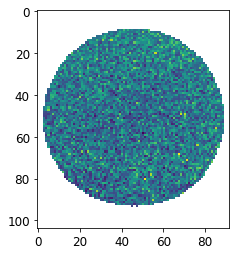

In [72]:
plt.imshow(window(ds1['tdisk'].values, step = step))

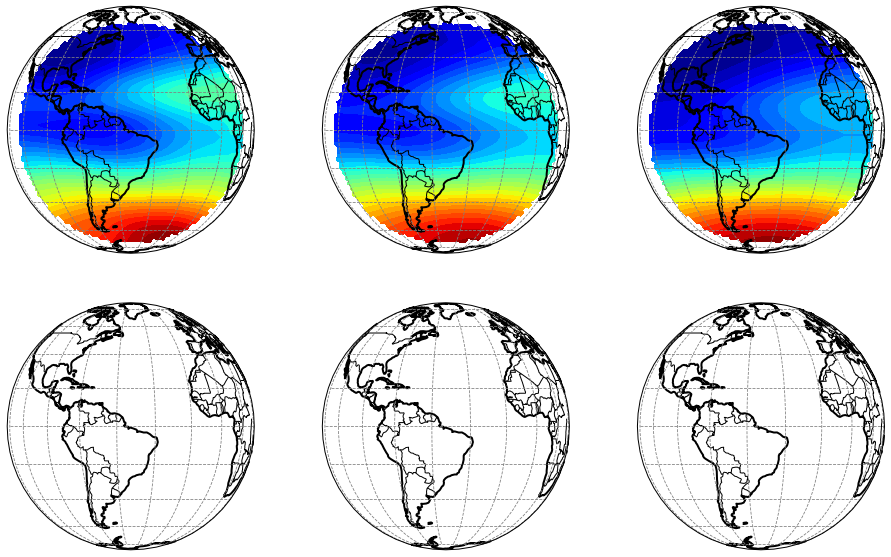

In [50]:

ax = fig.add_subplot(1, 2, 1, projection = ccrs.Orthographic(central_longitude= - 47.5))


ax.set(title = "(a) Brute values")

step = 8

features_of_map(ax)

img = ax.contourf(lons, lats, ds1['tdisk'].values, 30, cmap = 'jet', 
                transform = ccrs.PlateCarree())


    
cbar_ax = fig.add_axes([.09, 0.2, 0.02, 0.6])

cs = fig.colorbar(img, cax=cbar_ax, ticklocation='left')

cs.set_label(f"{name} ({units})")

fig.suptitle('GOLD \n' + split_filename(filename).date(), y = .99)

plt.rcParams.update({'font.size': 12})  

plt.show()

fig.savefig(f'mean_centering_0{step}.png', dpi = 100, quality = 95, bbox_inches="tight")


4
6
8
4
6
8


In [6]:
def window(data, step = 4):
    
    mrows, mcols = data.shape

    for i in range(mrows - step):
        for j in range(mcols - step):
            
            values = data[i:i+step, j:j+step]
            values[~np.isnan(values)] = np.nanmean(values)
            data[i:i+step, j:j+step] = values
            
    return data

def filter_times(ds, start = datetime.time(14, 30), end = datetime.time(15, 30)):
    times = []
    for elem in ds.nscans.values:
        if (elem.time() > start) and (elem.time() < end):
            times.append(elem)
    return times


n = ds.isel(nscans = np.arange(0, len(ds.nscans), 2))
s = ds.isel(nscans = np.arange(1, len(ds.nscans), 2))

combined = [] 

for i in range(len(n.nscans)):
    combined.append(n.isel(nscans = i).combine_first(s.isel(nscans = i)))
    
datasets = combined[::4]


In [ ]:
fig, ax = plt.subplots(figsize = (12, 12), ncols = 3, nrows = 3, 
                       subplot_kw={'projection': ccrs.Orthographic(central_longitude= - 47.5)})


plt.subplots_adjust(wspace = 0.1, hspace = 0.1)

parameter = 'tdisk'

name = ds[parameter].attrs['CATDESC']
units = ds[parameter].attrs['UNITS']

for ax, num in zip(ax.flat, range(len(datasets))):
    
    features_of_map(ax)
    
    time =  bytes_string(datasets[num]['scan_start_time'])
    time = str(time.values)[11:-9]
    
    ax.set(title = f'{time} UTC')
    
    ds1 = datasets[num]

    data = ds1[parameter].values
    lons = ds1['longitude'].values
    lats = ds1['latitude'].values
    
    data = window(data, step = 6)

    img = ax.contourf(lons, lats, data, 50, cmap = 'jet', 
                              transform = ccrs.PlateCarree())
     
    cbar_ax = fig.add_axes([.09, 0.2, 0.02, 0.6])

    cs = fig.colorbar(img, cax=cbar_ax, ticklocation='left')

    cs.set_label(f"{name} ({units})")
    
        
fig.suptitle('GOLD \n' + split_filename(filename).date(), y = .95)

plt.show()

In [65]:
def figure_name(files, emission):
    
    emission = emission.replace(' ', '_')
    
    if isinstance(files, list):
        
        if len(files) == 2:
            first, second = files[0], files[1]
        else:
            first, second = files[0], files[-1]
            
        start = split_filename(first)
        end = split_filename(second)
        time_start, time_end = start.time().replace(':',''), end.time().replace(':','')
        date = str(start.date(extent = False)).replace('-', '_')
        
        return f"GOLD_{start.product}_{emission}_{date}_{time_start}_{time_end}"
    else:
        start = split_filename(filename)
        if start.level == 'L2':
             return f"GOLD_{emission.upper()}_{start.level}_{str(start.date(extent = False)).replace('-', '_')}"
        

FigureName = figure_name(filename, parameter)

FigureName

'GOLD_TDISK_L2_2019_11_11'

In [66]:
PathOut = 'C:\\Users\\Luiz Felipe\\Google Drive\\Doutorado\\Modelos_Latex_INPE\\Figuras1\\'

fig.savefig(PathOut + FigureName + '.png', dpi = 100, quality = 95, bbox_inches="tight")


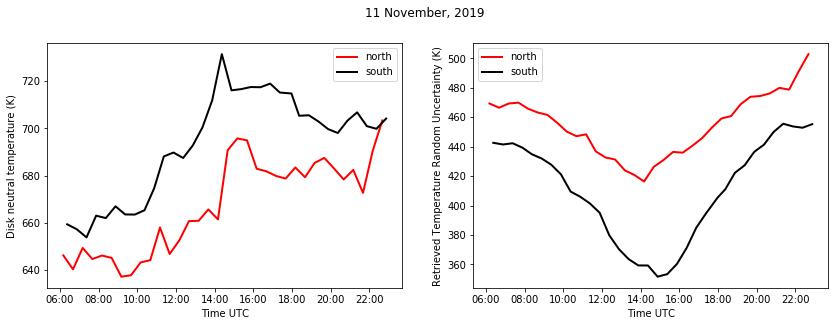

In [61]:

fig, ax = plt.subplots(figsize = (14, 5), ncols = 2)


parameters_list = ['tdisk', 'tdisk_unc_ran']

for ax, parameter in zip(ax.flat, parameters_list):
    
    plotting_hemispheres(ax, ds, parameter = parameter)

    ax.legend(['north', 'south'])

fig.autofmt_xdate(rotation=0, ha = 'center')

args_file = split_filename(filename)

fig.suptitle(args_file.date())

plt.show()